In [131]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.ndimage import maximum_filter
import librosa
import librosa.display
import soundfile

In [132]:
def plot_spectogram(sample, sample_rate):
    s = librosa.stft(sample)
    d = librosa.amplitude_to_db(np.abs(s), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(d, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.ylabel("Frequency, Hz") 
    plt.xlabel("Time, s")
    plt.show()

In [133]:
def find_minmax_freq(sample, sample_rate):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sample)), ref=np.max)

    frequencies = librosa.fft_frequencies(sr=sample_rate)

    mean_spec = np.mean(D, axis=1)

    idx_min = np.argmax(mean_spec > -80)
    idx_max = len(mean_spec) - np.argmax(mean_spec[::-1] > -80) - 1

    min_freq = frequencies[idx_min]
    max_freq = frequencies[idx_max]

    return min_freq, max_freq


In [134]:
def find_max_tembr(sample, sample_rate):
    chroma = librosa.feature.chroma_stft(y=sample, sr=sample_rate)
    f0 = librosa.piptrack(y=sample, sr=sample_rate, S=chroma)[0]
    max_f0 = np.argmax(f0)
    return max_f0

In [135]:
def find_formants(path):
    rate, sample = wavfile.read(path)

    freq, t, spec = signal.spectrogram(sample, rate)

    delta_t = int(0.1 * len(t))
    delta_freq = int(50 / (freq[1] - freq[0]))
    filtered = maximum_filter(spec, size=(delta_freq, delta_t))

    peaks_mask = (spec == filtered)
    peak_values = spec[peaks_mask]
    peak_frequencies = freq[peaks_mask.any(axis=1)]

    top_indices = np.argsort(peak_values)[-3:]
    top_frequencies = peak_frequencies[top_indices]

    return list(top_frequencies)

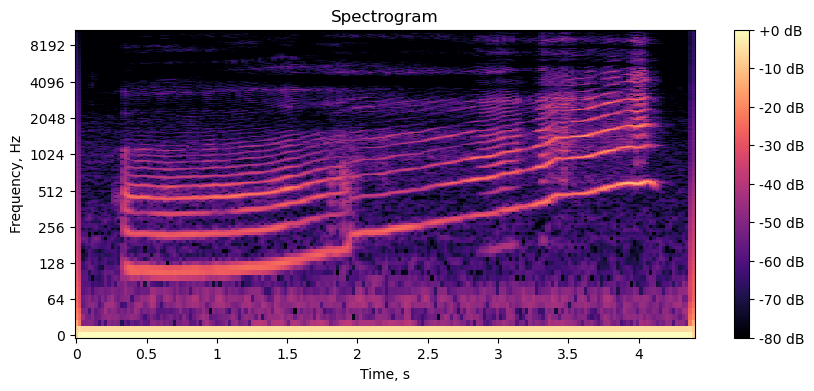

In [136]:
a_sample, a_sample_rate = librosa.load("input/a_mono.wav")
plot_spectogram(a_sample, a_sample_rate)

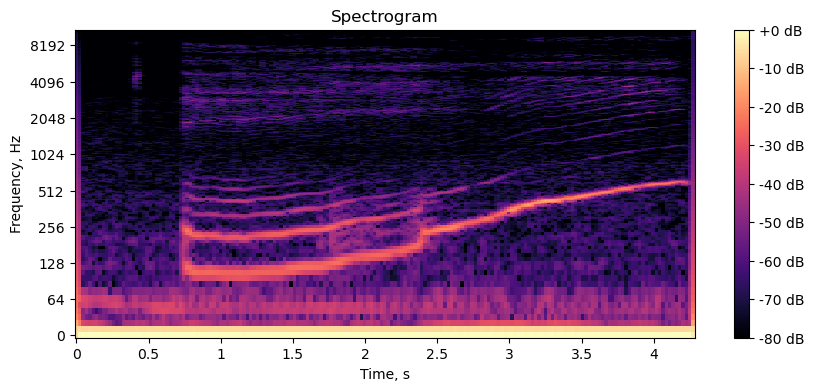

In [137]:
i_sample, i_sample_rate = librosa.load("input/i_mono.wav")
plot_spectogram(i_sample, i_sample_rate)

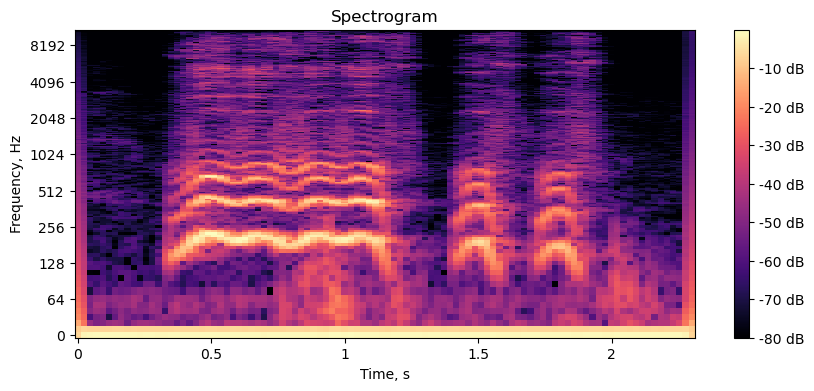

In [138]:
bark_sample, bark_sample_rate = librosa.load("input/bark_mono.wav")
plot_spectogram(bark_sample, bark_sample_rate)

In [139]:
a_min, a_max = find_minmax_freq(a_sample, a_sample_rate)
print(f"Min and Max for AAAAAAA: {a_min}, {a_max}")

i_min, i_max = find_minmax_freq(i_sample, i_sample_rate)
print(f"Min and Max for IIIIIII: {i_min}, {i_max}")

bark_min, bark_max = find_minmax_freq(bark_sample, bark_sample_rate)
print(f"Min and Max for BARK: {bark_min}, {bark_max}")

Min and Max for AAAAAAA: 0.0, 11025.0
Min and Max for IIIIIII: 0.0, 11025.0
Min and Max for BARK: 0.0, 11025.0


In [140]:
a_tembr = find_max_tembr(a_sample, a_sample_rate)
print(f"Max tembr for AAAAAAA: {a_tembr}")

i_tembr = find_max_tembr(i_sample, i_sample_rate)
print(f"Max tembr for IIIIIII: {i_tembr}")

bark_tembr = find_max_tembr(bark_sample, bark_sample_rate)
print(f"Max tembr for BARK: {bark_tembr}")

Max tembr for AAAAAAA: 647
Max tembr for IIIIIII: 600
Max tembr for BARK: 316


In [144]:
print(f"Formatns for AAAAAAAA: {find_formants("input/a_mono.wav")}, Hz")
print(f"Formatns for IIIIIIII: {find_formants("input/i_mono.wav")}, Hz")
print(f"Formatns for BARK: {find_formants("input/bark_mono.wav")}, Hz")

Formatns for AAAAAAAA: [6718.359375, 15331.640625, 5167.96875], Hz
Formatns for IIIIIIII: [4478.90625, 1378.125, 3273.046875], Hz
Formatns for BARK: [3445.3125, 5684.765625, 1722.65625], Hz
